In [1]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging

logging.basicConfig(level=logging.WARNING)
# logging.basicConfig(level=logging.DEBUG)
import shnitsel as st

In [2]:
from shnitsel.data.tree import ShnitselDB
from shnitsel.data.dataset_containers import Trajectory


test = ShnitselDB[Trajectory]
# print(dir(test))
# help(test.as_frames)

# res: ShnitselDB[Trajectory] = ShnitselDB[Trajectory](children={})

# from shnitsel.data.tree.xr_conversion import xarray_datatree_to_shnitsel_tree
# xarray_datatree_to_shnitsel_tree({}, None)

In [3]:
shnitsel_db_retinal: ShnitselDB[Trajectory] = st.io.read(
    'tut_data/traj_I02.nc', parallel=True
).set_charge(1.)  # type: ignore

In [5]:
shnitsel_db_retinal['/I02/0/data']

Trajectory(_raw_dataset=<xarray.Dataset> Size: 338kB
Dimensions:              (time: 384, state: 3, atom: 14, direction: 3,
                          statecomb: 3, full_statecomb: 6)
Coordinates: (12/16)
  * time                 (time) float64 3kB 0.0 0.5 1.0 ... 190.5 191.0 191.5
  * state                (state) int64 24B 1 2 3
  * atom                 (atom) int64 112B 0 1 2 3 4 5 6 7 8 9 10 11 12 13
  * direction            (direction) <U1 12B 'x' 'y' 'z'
  * statecomb            (statecomb) object 24B MultiIndex
  * full_statecomb       (full_statecomb) object 48B MultiIndex
    ...                   ...
    atNums               (atom) int64 112B ...
  * from                 (statecomb) int64 24B 1 1 2
  * to                   (statecomb) int64 24B 2 3 3
  * full_statecomb_from  (full_statecomb) int64 48B 1 1 2 2 3 3
  * full_statecomb_to    (full_statecomb) int64 48B 2 3 1 3 1 2
    charge               float64 8B 1.0
Data variables:
    energy               (time, state) float32 5kB ...
    forces               (time, state, atom, direction) float32 194kB ...
    atXYZ                (time, atom, direction) float32 65kB ...
    dip_perm             (time, state, direction) float32 14kB ...
    dip_trans            (time, statecomb, direction) float32 14kB ...
    socs                 (time, full_statecomb) complex128 37kB ...
    astate               (time) int32 2kB ...
    sdiag                (time) int32 2kB ...
    phases               (time, state) float32 5kB ...
Attributes: (12/15)
    input_format:           sharc
    t_max:                  1000.0
    delta_t:                0.5
    max_ts:                 384
    completed:              False
    input_type:             dynamic
    ...                     ...
    num_triplets:           0
    has_forces:             True
    misc_input_settings:    {'input': {'printlevel': '2', 'geomfile': '"geom"...
    trajectory_input_path:  retinal_tutorial/I02/TRAJ_00001
    trajid:                 1
    DataTree_Level:         TrajectoryData)

## Basic datasheet test

In [21]:
from shnitsel.data.tree import CompoundInfo
from shnitsel.data.tree import ShnitselDB
from shnitsel.data.dataset_containers import Trajectory
import xarray as xr

# shnitsel_db_single_nx: Trajectory = st.io.read(
#     'test_data/newtonx/test_I01_v2.6/', parallel=False
# )  # type: ignore
shnitsel_db_single_nx: ShnitselDB[Trajectory] = st.io.read(
    'test_data/newtonx/test_pyrazene_v2.6', parallel=True
)  # type: ignore
shnitsel_db_single_nx = shnitsel_db_single_nx.set_compound_info('pyrazene')

shnitsel_db_retinal: ShnitselDB[Trajectory] = st.io.read(
    'tut_data/traj_I02.nc', parallel=False
)  # type: ignore

shnitsel_db_retinal = shnitsel_db_retinal.set_charge(1)

from shnitsel.data.tree.support_functions import tree_merge

shnitsel_mega = tree_merge(shnitsel_db_retinal, shnitsel_db_single_nx)
shnitsel_mega

# trajectory = list(shnitsel_db_retinal.collect_data())[0]
# print(type(trajectory))
# print([x for x in dir(trajectory.dataset) if not x.startswith('_')])  # .__getattr__
# print([x for x in dir(xr.Dataset) if not x.startswith('_')])

  0%|          | 0/5 [00:00<?, ?it/s]

<class 'shnitsel.data.tree.tree.ShnitselDBRoot[Trajectory]'> [{'level': 'ShnitselDBRoot', 'children': '2: {\'I02\': \'ABCMeta(_name=\\\'I02\\\', _dtype=<class \\\'shnitsel.data.dataset_containers.trajectory.Trajectory\\\'>, _data=None, _children={\\\'0\\\': ABCMeta(_name=\\\'0\\\', _dtype=<class \\\'shnitsel.data.dataset_containers.trajectory.Trajectory\\\'>, _data=Trajectory(_raw_dataset=<xarray.Dataset> Size: 338kB\\nDimensions:              (time: 384, state: 3, atom: 14, direction: 3,\\n                          statecomb: 3, full_statecomb: 6)\\nCoordinates: (12/16)\\n  * time                 (time) float64 3kB 0.0 0.5 1.0 ... 190.5 191.0 191.5\\n  * state                (state) int64 24B 1 2 3\\n  * atom                 (atom) int64 112B 0 1 2 3 4 5 6 7 8 9 10 11 12 13\\n  * direction            (direction) <U1 12B \\\'x\\\' \\\'y\\\' \\\'z\\\'\\n  * statecomb            (statecomb) object 24B MultiIndex\\n  * full_statecomb       (full_statecomb) object 48B MultiIndex\\n    ...                   ...\\n    atNums               (atom) int64 112B ...\\n  * from                 (statecomb) int64 24B 1 1 2\\n  * to                   (statecomb) int64 24B 2 3 3\\n  * full_statecomb_from  (full_statecomb) int64 48B 1 1 2 2 3 3\\n  * full_statecomb_to    (full_statecomb) int64 48B 2 3 1 3 1 2\\n    charge               float64 8B 1.0\\nData variables:\\n    energy               (time, state) float32 5kB ...\\n    forces               (time, state, atom, direction) float32 194kB ...\\n    atXYZ                (time, atom, direction) float32 65kB ...\\n    dip_perm             (time, state, direction) float32 14kB ...\\n    dip_trans            (time, statecomb, direction) float32 14kB ...\\n    socs                 (time, full_statecomb) complex128 37kB ...\\n    astate               (time) int32 2kB ...\\n    sdiag                (time) int32 2kB ...\\n    phases               (time, state) float32 5kB ...\\nAttributes: (12/15)\\n    input_format:           sharc\\n    t_max:                  1000.0\\n    delta_t:                0.5\\n    max_ts:                 384\\n    completed:              False\\n    input_type:             dynamic\\n    ...                     ...\\n    num_triplets:           0\\n    has_forces:             True\\n    misc_input_settings:    {\\\'input\\\': {\\\'printlevel\\\': \\\'2\\\', \\\'geomfile\\\': \\\'"geom"...\\n    trajectory_input_path:  retinal_tutorial/I02/TRAJ_00001\\n    trajid:                 1\\n    DataTree_Level:         TrajectoryData), _children={}, _attrs={\\\'input_format\\\': \\\'sharc\\\', \\\'t_max\\\': 1000.0, \\\'delta_t\\\': 0.5, \\\'max_ts\\\': 384, \\\'completed\\\': False, \\\'input_type\\\': \\\'dynamic\\\', \\\'input_format_version\\\': \\\'3.0\\\', \\\'num_singlets\\\': 3, \\\'num_doublets\\\': 0, \\\'num_triplets\\\': 0, \\\'has_forces\\\': True, \\\'misc_input_settings\\\': {\\\'input\\\': {\\\'printlevel\\\': \\\'2\\\', \\\'geomfile\\\': \\\'"geom"\\\', \\\'veloc\\\': \\\'external\\\', \\\'velocfile\\\': \\\'"veloc"\\\', \\\'nstates\\\': [3], \\\'actstates\\\': \\\'3\\\', \\\'state\\\': \\\'2 mch\\\', \\\'coeff\\\': \\\'auto\\\', \\\'rngseed\\\': \\\'5199\\\', \\\'ezero\\\': \\\'-248.2781283000\\\', \\\'tmax\\\': \\\'1000.000000\\\', \\\'stepsize\\\': \\\'0.500000\\\', \\\'nsubsteps\\\': \\\'25\\\', \\\'integrator\\\': \\\'fvv\\\', \\\'method\\\': \\\'tsh\\\', \\\'surf\\\': \\\'diagonal\\\', \\\'coupling\\\': \\\'overlap\\\', \\\'nogradcorrect\\\': True, \\\'ekincorrect\\\': \\\'parallel_vel\\\', \\\'reflect_frustrated\\\': \\\'none\\\', \\\'decoherence_scheme\\\': \\\'edc\\\', \\\'decoherence_param\\\': \\\'0.1\\\', \\\'hopping_procedure\\\': \\\'sharc\\\', \\\'grad_all\\\': True, \\\'eselect\\\': \\\'0.001000\\\', \\\'select_directly\\\': True, \\\'nospinorbit\\\': True, \\\'write_grad\\\': True, \\\'write_nacdr\\\': True, \\\'write_overlap\\\': True, \\\'output_format\\\': \\\'ascii\\\', \\\'output_dat_steps\\\': \\\'1\\\'}, \\\'output.dat\\\': {\\\'SHARC_vers

In [5]:
# print(shnitsel_db_retinal._repr_html_())
shnitsel_db_retinal.compounds['I02'].children['0'].data.charge
list(shnitsel_db_retinal.charge.collect_data())
# shnitsel_db_retinal.charge

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [6]:
from shnitsel.data.tree import ShnitselDB
from shnitsel.data.dataset_containers import Trajectory, Frames

print(
    [
        d
        for d in dir(ShnitselDB)
        if not d.startswith("_") and isinstance(getattr(ShnitselDB, d, None), property)
    ]
)
print(
    [
        d
        for d in dir(ShnitselDB)
        if not d.startswith("_") and callable(getattr(ShnitselDB, d, None))
    ]
)
# print(vars(ShnitselDB))
# print(ShnitselDB.dtype)
# print(type(ShnitselDB.dtype))
print(ShnitselDB[int])
trajorframes_t = Trajectory | Frames
print(trajorframes_t)
tof_meta_t = type(trajorframes_t)
print(tof_meta_t)

print(dir(trajorframes_t))
print(trajorframes_t.__parameters__)
from typing import get_args

print(get_args(trajorframes_t))

['attrs', 'children', 'compounds', 'data', 'dtype', 'has_data', 'is_leaf', 'name', 'path']
['add_child', 'add_compound', 'add_data_group', 'apply_data_attributes', 'assign_children', 'collect_data', 'construct_copy', 'filter_nodes', 'group_children_by', 'group_data_by_metadata', 'is_level', 'map_data', 'map_filtered_nodes', 'map_flat_group_data', 'map_subtree', 'set_compound_info']
<class 'shnitsel.data.tree.tree.ShnitselDBRoot[int]'>
shnitsel.data.dataset_containers.trajectory.Trajectory | shnitsel.data.dataset_containers.frames.Frames
<class 'types.UnionType'>
['__args__', '__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__or__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__ror__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']
()
(<class 'shnitsel.data.dataset_containers.

In [7]:
from shnitsel.clean import sanity_check

# shnitsel_db_single_nx = set_charges(shnitsel_db_single_nx)

# # shnitsel_db_full_newtonx = shnitsel_db_full_newtonx.map_over_trajectories(set_charges)  # type: ignore
# shnitsel_db_full_newtonx = shnitsel_db_full.map_over_trajectories(set_charges)
# shnitsel_db_single_nx
# shnitsel_db_single_nx.isel(time=0,state=3).forces
# len(list(shnitsel_db_retinal.collect_data()))
shnitsel_db_retinal_filtered = sanity_check(
    shnitsel_db_retinal, drop_empty_trajectories=True
)

In [8]:
from shnitsel.clean import sanity_check

shnitsel_db_single_nx_filtered = sanity_check(
    shnitsel_db_single_nx, drop_empty_trajectories=True
)

In [9]:
from shnitsel.data.shnitsel_db.db_function_decorator import concat_subtree
from shnitsel.filtering.structure_selection import StructureSelection

concatted_tree = concat_subtree(shnitsel_db_retinal)
frame = concatted_tree.isel(frame=0).squeeze()
sel = StructureSelection.init_from_dataset(concatted_tree, default_selection=['angles'])

from shnitsel.geo.geocalc_.bla_chromophor import get_max_chromophor_BLA

res_sel = sel.select_all(['atoms', 'bonds'])


res = get_max_chromophor_BLA(concatted_tree.atXYZ, structure_selection=res_sel)
res

<xarray.DataArray 'atXYZ' (frame: 6452)> Size: 26kB
array([0.10997677, 0.10950518, 0.10680151, ..., 0.14393115, 0.15356755,
       0.16359758], shape=(6452,), dtype=float32)
Coordinates:
  * frame        (frame) object 52kB MultiIndex
    charge       float64 8B 1.0
  * atrajectory  (frame) int32 26kB 1 1 1 1 1 1 1 1 ... 20 20 20 20 20 20 20 20
  * time         (frame) float64 52kB 0.0 0.5 1.0 1.5 ... 218.0 218.5 219.0
Attributes:
    long_name:   Positions
    unitdim:     length
    units:       Bohr
    __assigned:  True

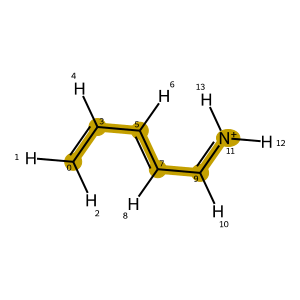

In [10]:
res_sel.select_BLA_chromophor().draw(flag_level=2)

In [11]:
from shnitsel.data.shnitsel_db.db_function_decorator import concat_subtree
from shnitsel.filtering.structure_selection import StructureSelection

concatted_tree = concat_subtree(shnitsel_db_single_nx)
frame = concatted_tree.isel(frame=0).squeeze()
sel = StructureSelection.init_from_dataset(frame, default_selection=['angles'])

from shnitsel.geo.geocalc_.bla_chromophor import get_max_chromophor_BLA

res_sel = sel.select_all(['atoms', 'bonds'])


res = get_max_chromophor_BLA(concatted_tree.atXYZ)
res

<xarray.DataArray 'atXYZ' (frame: 1005)> Size: 8kB
array([-0.02272949, -0.02260822, -0.02163931, ..., -0.01392826,
       -0.03541158, -0.05643772], shape=(1005,))
Coordinates:
  * frame        (frame) object 8kB MultiIndex
  * atrajectory  (frame) int32 4kB 1 1 1 1 1 1 1 1 1 ... 99 99 99 99 99 99 99 99
  * time         (frame) float64 8kB 0.0 0.5 1.0 1.5 ... 98.5 99.0 99.5 100.0
Attributes:
    long_name:  Positions
    unitdim:    length
    units:      Bohr
    unit:       Bohr

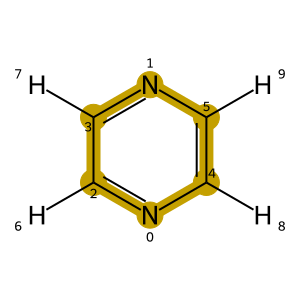

In [12]:
res_sel.select_BLA_chromophor().draw(flag_level=2)

In [13]:
from shnitsel.geo.geocalc import get_bats
import xarray as xr
from shnitsel.filtering.structure_selection import StructureSelection

dataset_tmp: Trajectory = list(shnitsel_db_retinal.collect_data())[0]
# TODO: FIXME: Pyramids have an indexer double application
structure_selection = StructureSelection.init_from_dataset(dataset_tmp, ['angles', 'dihedrals'])#, 'pyramids'])

bats_data = get_bats(shnitsel_db_retinal, structure_selection=structure_selection)

xr.concat(bats_data.collect_data(), dim='time')

<xarray.DataArray 'angle' (descriptor: 38, time: 6452)> Size: 981kB
array([[122.40694  , 121.94916  , 121.433876 , ..., 146.29749  ,
        147.4258   , 148.13945  ],
       [125.4372   , 125.25042  , 124.9465   , ..., 128.40424  ,
        128.47871  , 128.36133  ],
       [117.649025 , 117.55438  , 117.46835  , ..., 106.68721  ,
        105.19346  , 103.93855  ],
       ...,
       [179.13747  , 179.80922  , 178.81535  , ..., 161.6689   ,
        164.05057  , 166.62798  ],
       [  9.621631 ,   8.757821 ,   7.8963766, ...,   6.1778398,
          1.0744718,   4.013516 ],
       [169.22687  , 167.24527  , 165.33797  , ..., 162.2622   ,
        161.25931  , 160.49165  ]], shape=(38, 6452), dtype=float32)
Coordinates:
  * descriptor       (descriptor) <U15 2kB 'angle(3,5,6)' ... 'dih(1,0,3,4)'
  * time             (time) float64 52kB 0.0 0.5 1.0 1.5 ... 218.0 218.5 219.0
    charge           float64 8B 1.0
    descriptor_tex   (descriptor) <U20 3kB '\\theta_{3,5,6}' ... '\\varphi_{1...
  * descriptor_type  (descriptor) <U5 760B 'angle' 'angle' ... 'dih' 'dih'
  * feature_indices  (descriptor) object 304B (3, 5, 6) ... (1, 0, 3, 4)
Attributes:
    units:      degrees
    long_name:  \theta_{3,5,6}

In [ ]:
from shnitsel.clean import sanity_check
from shnitsel.clean.filter_geo import GeometryFiltrationThresholds

geo_thresholds = GeometryFiltrationThresholds()
geo_thresholds.length_unit = 'angstrom'
geo_thresholds.match_thresholds["[#6][#1]"] = 2.0

# print(shnitsel_db_retinal)


shnitsel_db_retinal_filtered = sanity_check(
    shnitsel_db_retinal, 'truncate', geometry_thresholds=geo_thresholds
)
type(shnitsel_db_retinal_filtered)

shnitsel.data.tree.tree.ShnitselDBRoot[Trajectory]

In [18]:
from shnitsel.data.dataset_containers.shared import ShnitselDataset

print(type(("hello", ShnitselDataset(xr.Dataset()))))

tret = list(shnitsel_db_retinal_filtered.collect_data())[0]
structure_retinal = StructureSelection.init_from_dataset(tret, ['bonds', 'dihedrals', 'angles'])

<class 'tuple'>


Rendering coupling page for 3 states with at least 3 relevant state transitions.


100%|██████████| 3/3 [00:00<00:00, 314.97it/s]


Saving datasheet as pdf. Please be patient, this may take some time.


Written: 100%|██████████| 1/1 [00:02<00:00,  2.33s/page]


Writing pdf with 4 pages
Rendering coupling page for 3 states with at least 3 relevant state transitions.


100%|██████████| 3/3 [00:00<00:00, 361.85it/s]


Saving datasheet as pdf. Please be patient, this may take some time.


Written: 100%|██████████| 1/1 [00:12<00:00, 12.67s/page]


Writing pdf with 4 pages
Rendering coupling page for 7 states with at least 21 relevant state transitions.


100%|██████████| 21/21 [00:00<00:00, 1178.79it/s]


Saving datasheet as pdf. Please be patient, this may take some time.


Written: 100%|██████████| 1/1 [00:10<00:00, 10.08s/page]


Writing pdf with 4 pages


IndexError: index 10 is out of bounds for axis 0 with size 10

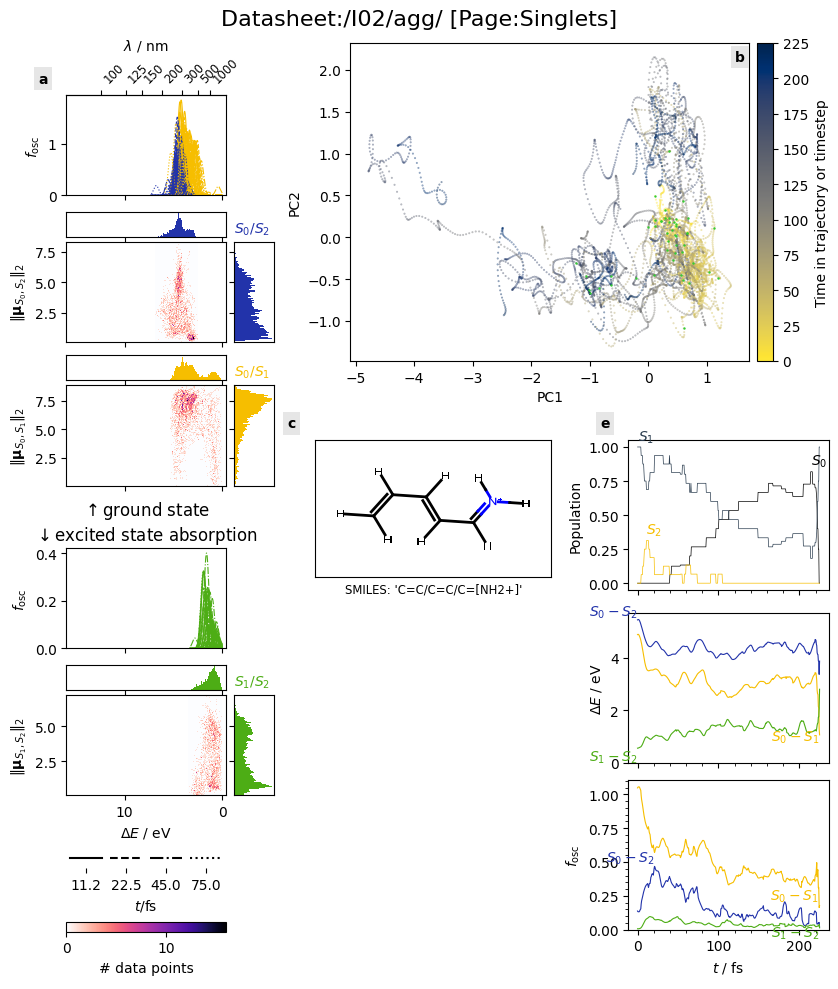

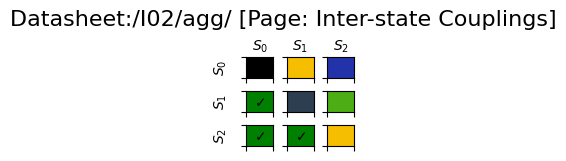

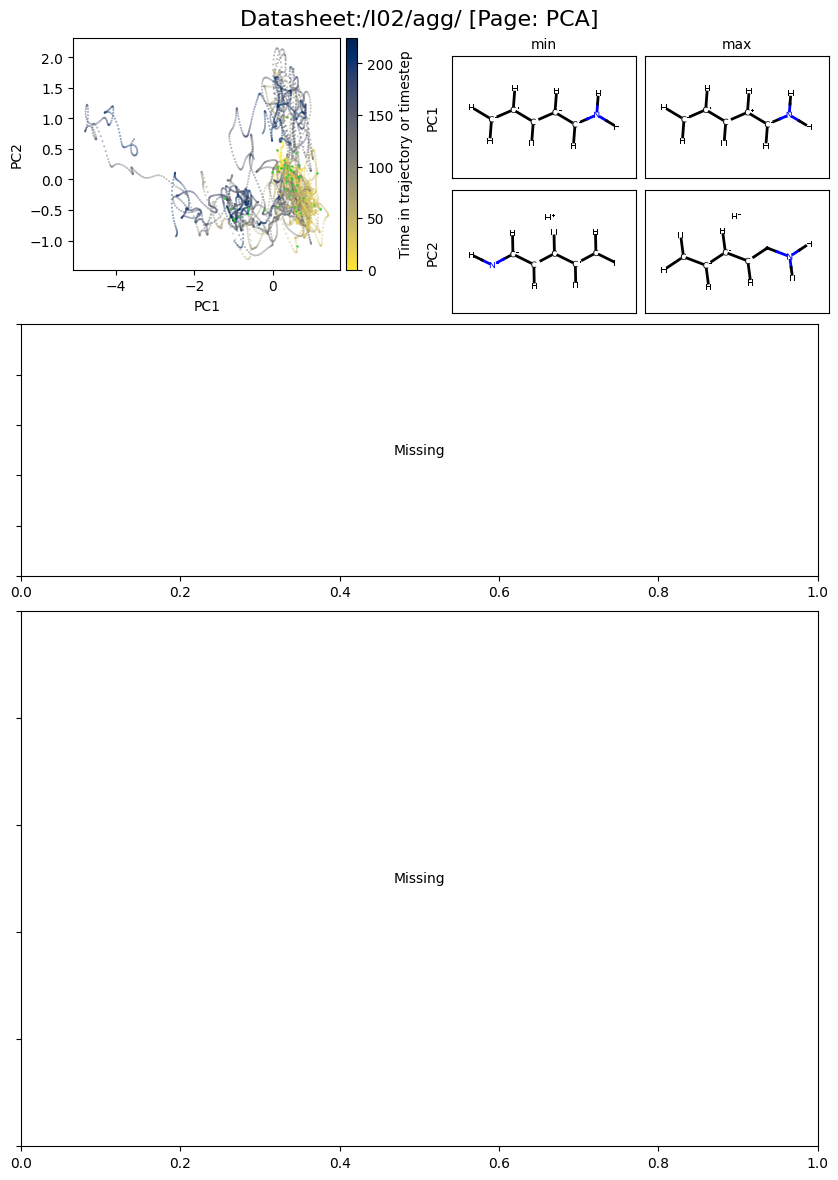

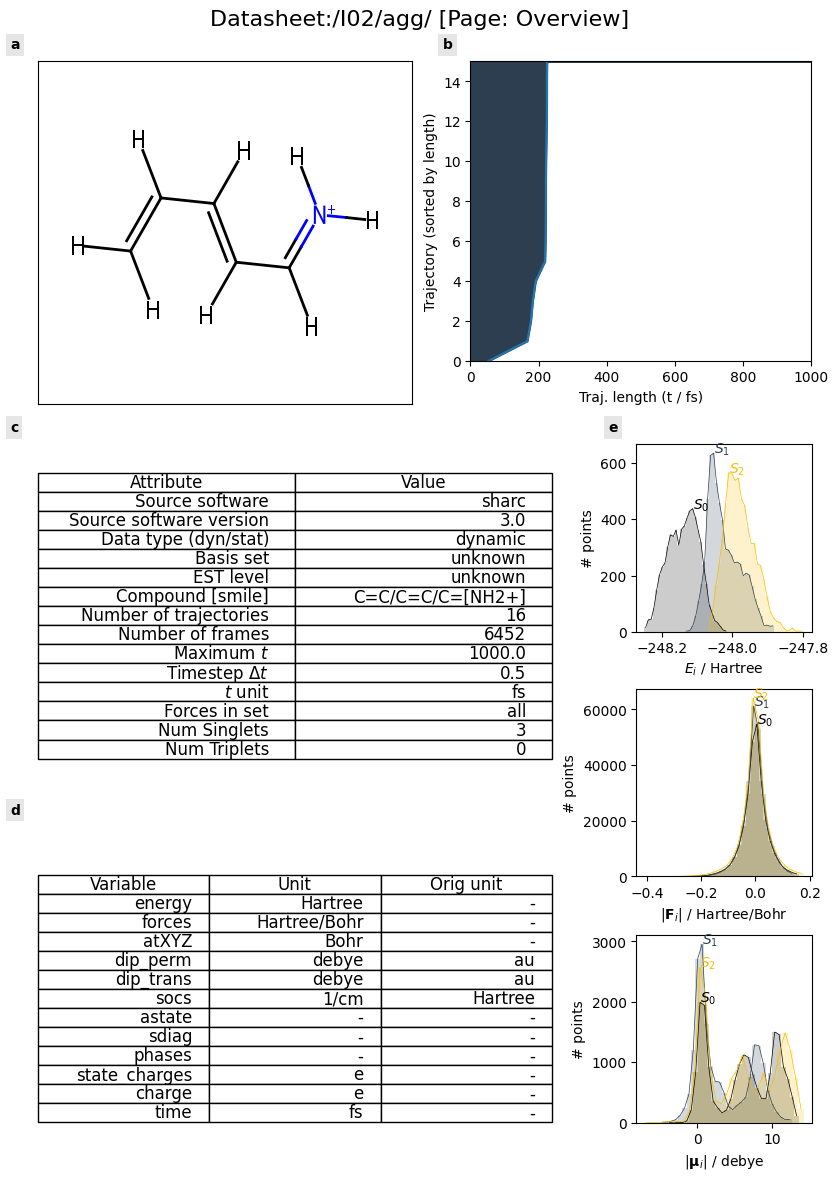

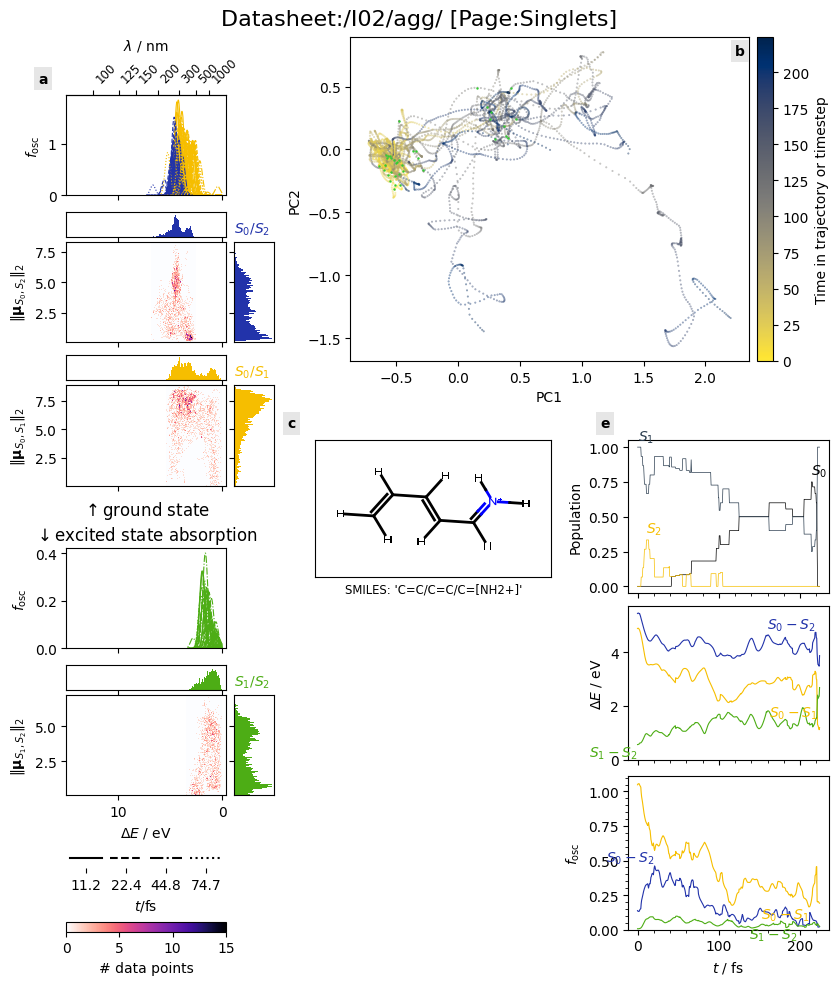

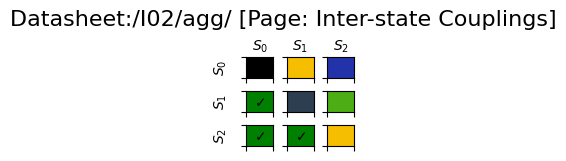

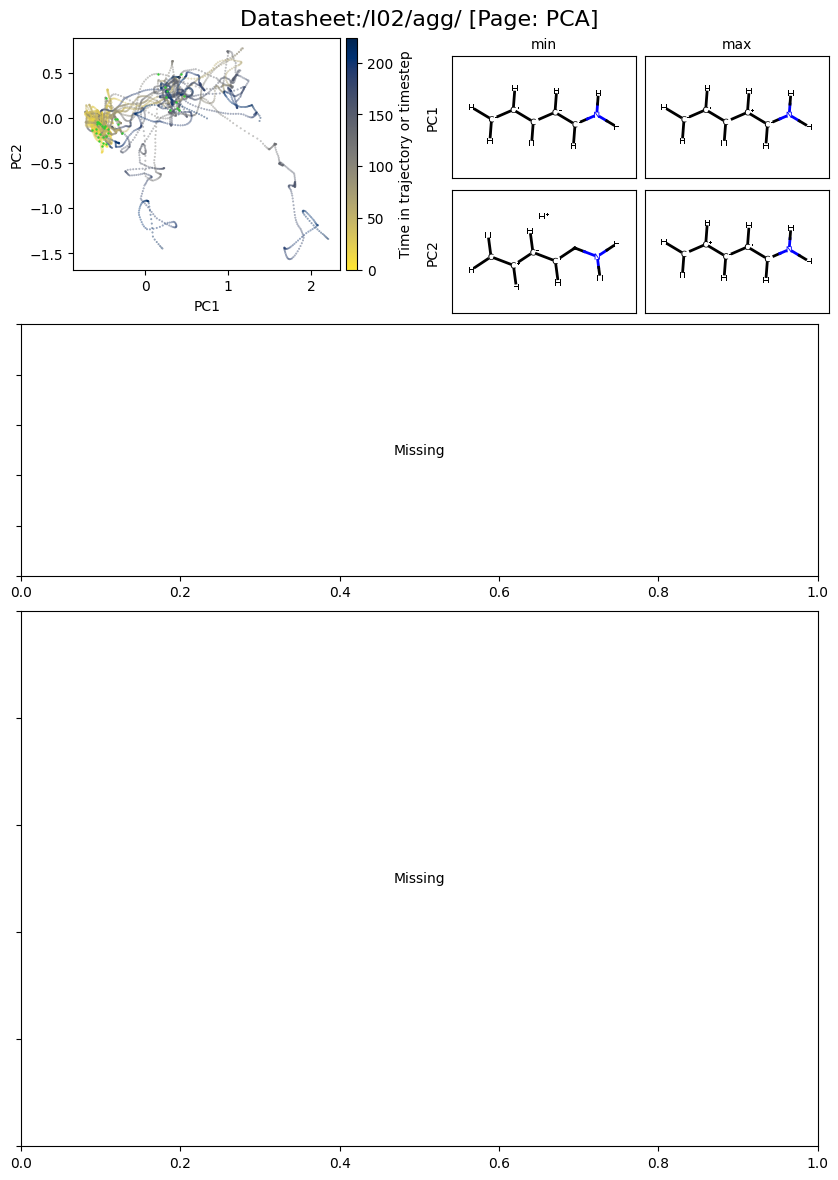

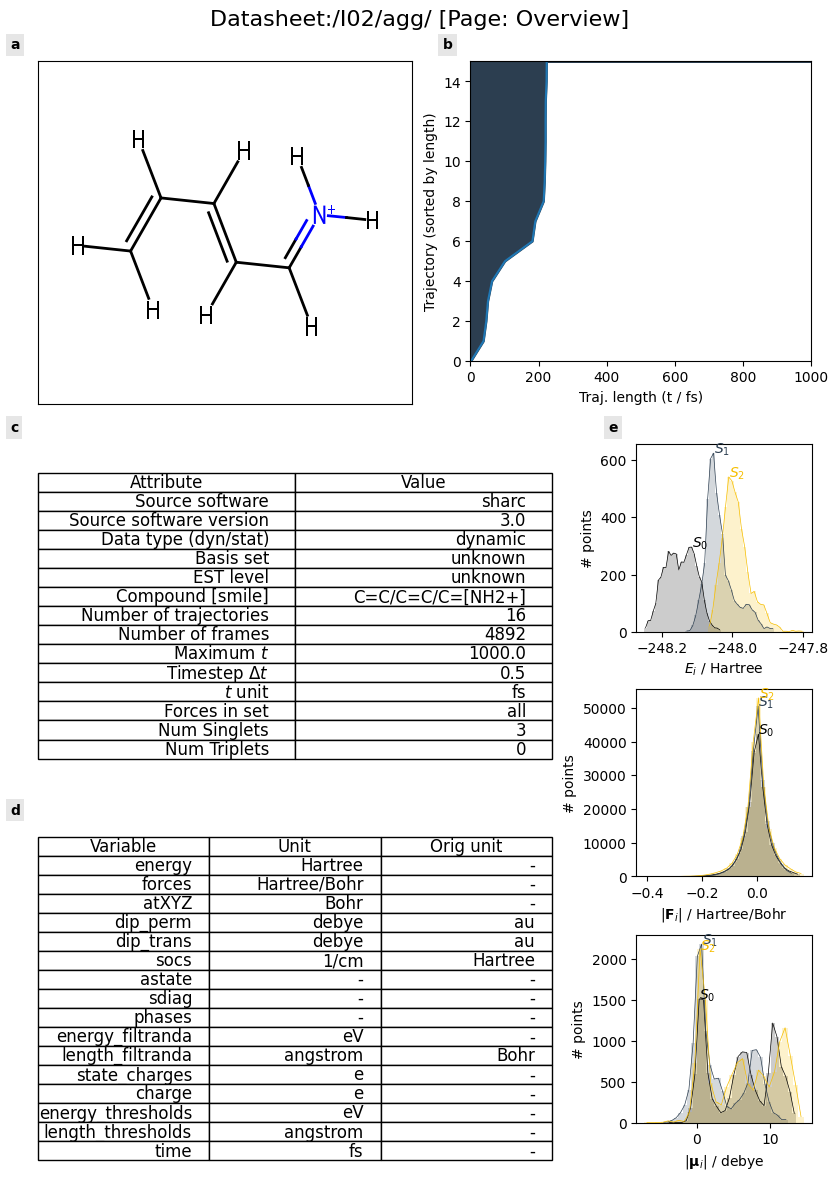

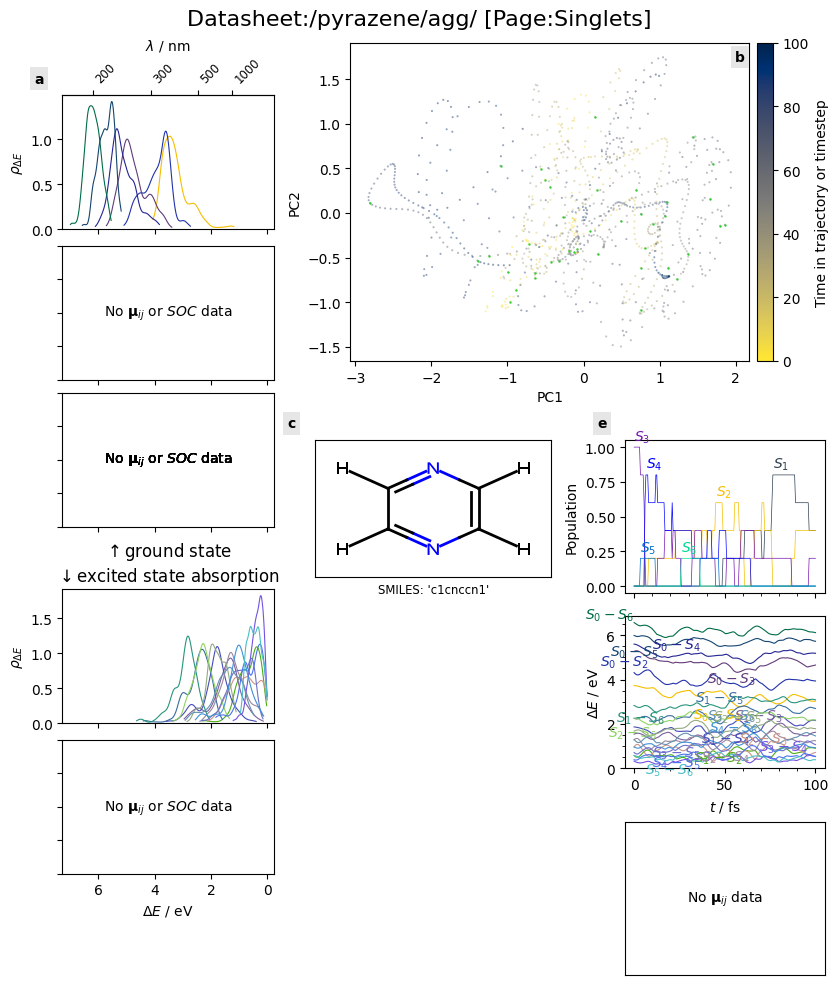

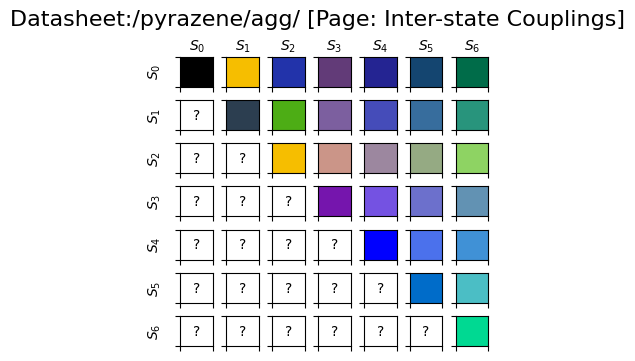

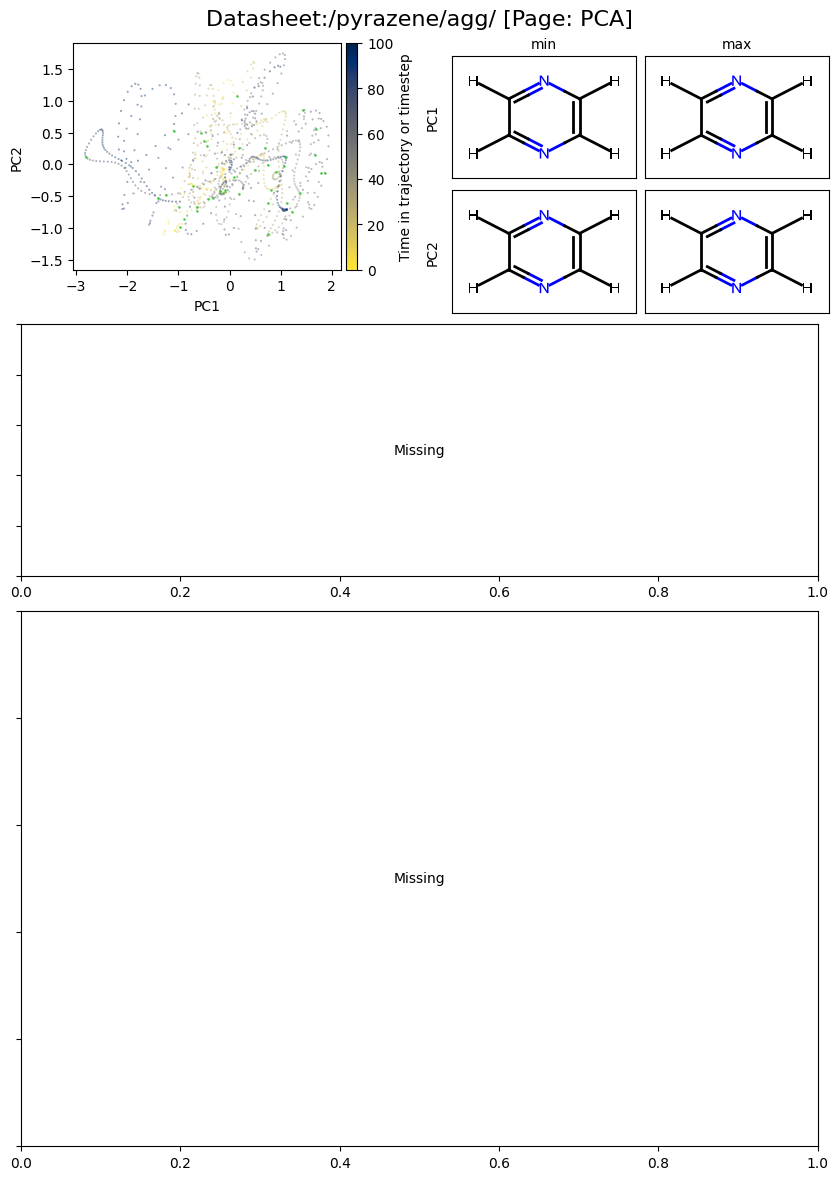

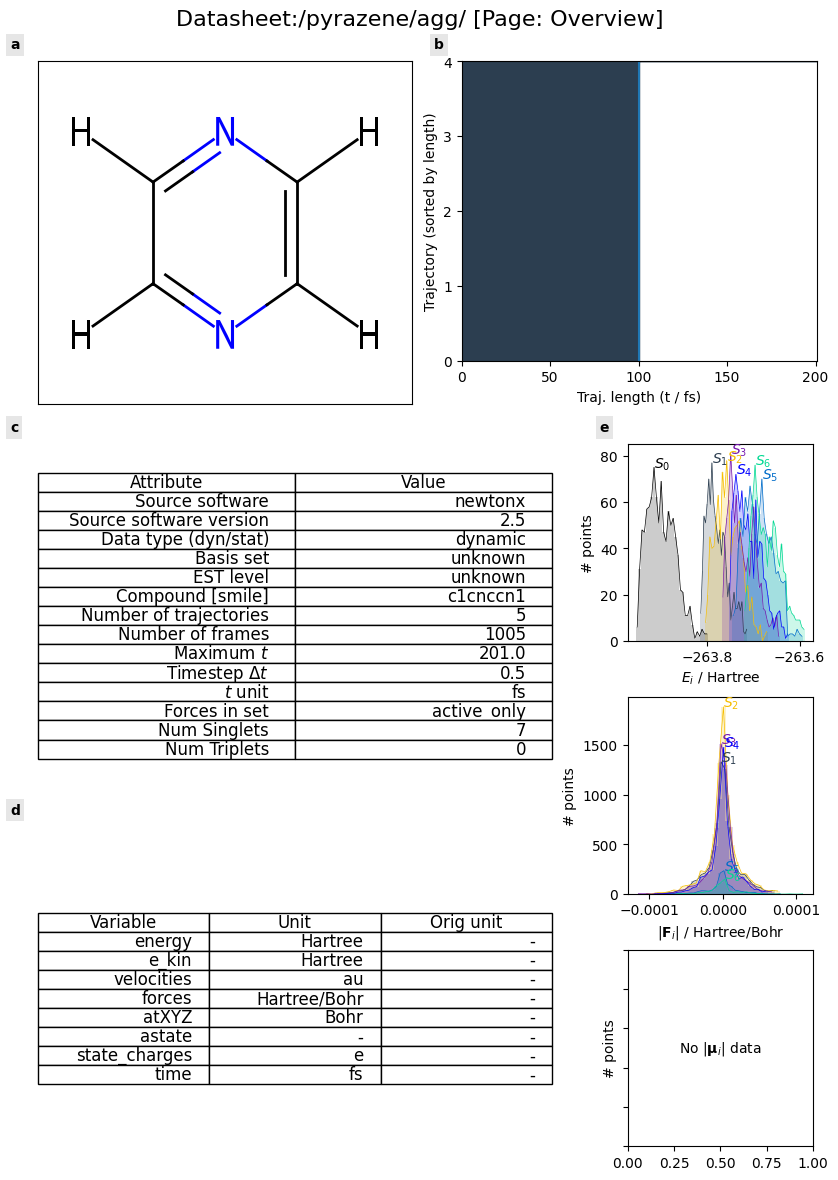

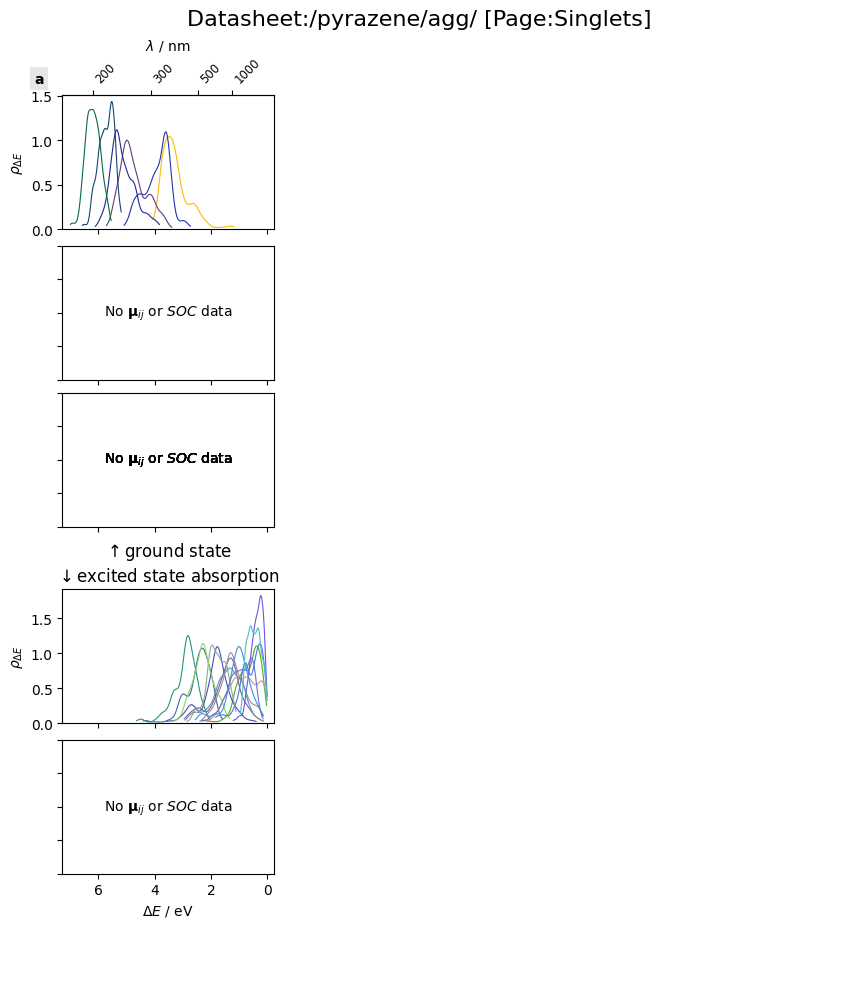

In [19]:
from shnitsel.vis.datasheet import Datasheet

sheet = Datasheet(shnitsel_db_retinal)
# # shnitsel_db_triplet
# # sheet.datasheet_pages['root'].charge = 1
# # sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(
    include_meta_page=True, include_pca_page=True, path="./datasheet_retinal.pdf"
)

sheet = Datasheet(shnitsel_db_retinal_filtered, feature_selection=structure_retinal)
# # shnitsel_db_triplet
# # sheet.datasheet_pages['root'].charge = 1
# # sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(
    include_meta_page=True,
    include_pca_page=True,
    path="./datasheet_retinal_filtered.pdf",
)

sheet = Datasheet(shnitsel_db_single_nx, feature_selection=structure_retinal)
# shnitsel_db_triplet
# sheet.datasheet_pages['root'].charge = 1
# sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(include_meta_page=True, include_pca_page=True, path="./triplet_newtonx.pdf")
# sheet.datasheet_pages

sheet = Datasheet(shnitsel_db_single_nx_filtered, feature_selection=structure_retinal)
# shnitsel_db_triplet
# sheet.datasheet_pages['root'].charge = 1
# sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(
    include_meta_page=True, include_pca_page=True, path="./triplet_newtonx_filtered.pdf"
)

In [20]:
shnitsel_db_retinal_filtered

<class 'shnitsel.data.tree.tree.ShnitselDBRoot[Trajectory]'> [{'level': 'ShnitselDBRoot', 'children': '1: {\'I02\': \'ABCMeta(_name=\\\'I02\\\', _dtype=<class \\\'shnitsel.data.dataset_containers.trajectory.Trajectory\\\'>, _data=None, _children={\\\'0\\\': ABCMeta(_name=\\\'0\\\', _dtype=<class \\\'shnitsel.data.dataset_containers.trajectory.Trajectory\\\'>, _data=Trajectory(_raw_dataset=<xarray.Dataset> Size: 345kB\\nDimensions:              (time: 382, state: 3, atom: 14, direction: 3,\\n                          statecomb: 3, full_statecomb: 6, energy_criterion: 2,\\n                          length_criterion: 3)\\nCoordinates: (12/20)\\n  * time                 (time) float64 3kB 0.0 0.5 1.0 ... 189.5 190.0 190.5\\n  * state                (state) int64 24B 1 2 3\\n  * atom                 (atom) int64 112B 0 1 2 3 4 5 6 7 8 9 10 11 12 13\\n  * direction            (direction) <U1 12B \\\'x\\\' \\\'y\\\' \\\'z\\\'\\n  * statecomb            (statecomb) object 24B MultiIndex\\n  * full_statecomb       (full_statecomb) object 48B MultiIndex\\n    ...                   ...\\n    to                   (statecomb) int64 24B 2 3 3\\n    full_statecomb_from  (full_statecomb) int64 48B 1 1 2 2 3 3\\n    full_statecomb_to    (full_statecomb) int64 48B 2 3 1 3 1 2\\n    charge               float64 8B 1.0\\n    energy_thresholds    (energy_criterion) float64 16B 0.7 1.0\\n    length_thresholds    (length_criterion) float64 24B 2.0 3.0 2.0\\nData variables:\\n    energy               (time, state) float32 5kB -248.2 -248.0 ... -248.0\\n    forces               (time, state, atom, direction) float32 193kB 0.02007...\\n    atXYZ                (time, atom, direction) float32 64kB -4.182 ... 3.616\\n    dip_perm             (time, state, direction) float32 14kB 6.736 ... 1.438\\n    dip_trans            (time, statecomb, direction) float32 14kB -6.596 ......\\n    socs                 (time, full_statecomb) complex128 37kB 0j 0j ... 0j 0j\\n    astate               (time) int32 2kB 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1\\n    sdiag                (time) int32 2kB 2 2 2 2 2 2 2 2 2 ... 1 1 1 1 1 1 1 1\\n    phases               (time, state) float32 5kB -1.0 -1.0 -1.0 ... 1.0 1.0\\n    energy_filtranda     (energy_criterion, time) float32 3kB 0.0 0.1572 ... 0.0\\n    length_filtranda     (length_criterion, time) float32 5kB 1.184 ... 1.21\\nAttributes: (12/15)\\n    input_format:           sharc\\n    t_max:                  1000.0\\n    delta_t:                0.5\\n    max_ts:                 384\\n    completed:              False\\n    input_type:             dynamic\\n    ...                     ...\\n    num_triplets:           0\\n    has_forces:             True\\n    misc_input_settings:    {\\\'input\\\': {\\\'printlevel\\\': \\\'2\\\', \\\'geomfile\\\': \\\'"geom"...\\n    trajectory_input_path:  retinal_tutorial/I02/TRAJ_00001\\n    trajid:                 1\\n    DataTree_Level:         TrajectoryData), _children={}, _attrs={\\\'input_format\\\': \\\'sharc\\\', \\\'t_max\\\': 1000.0, \\\'delta_t\\\': 0.5, \\\'max_ts\\\': 384, \\\'completed\\\': False, \\\'input_type\\\': \\\'dynamic\\\', \\\'input_format_version\\\': \\\'3.0\\\', \\\'num_singlets\\\': 3, \\\'num_doublets\\\': 0, \\\'num_triplets\\\': 0, \\\'has_forces\\\': True, \\\'misc_input_settings\\\': {\\\'input\\\': {\\\'printlevel\\\': \\\'2\\\', \\\'geomfile\\\': \\\'"geom"\\\', \\\'veloc\\\': \\\'external\\\', \\\'velocfile\\\': \\\'"veloc"\\\', \\\'nstates\\\': [3], \\\'actstates\\\': \\\'3\\\', \\\'state\\\': \\\'2 mch\\\', \\\'coeff\\\': \\\'auto\\\', \\\'rngseed\\\': \\\'5199\\\', \\\'ezero\\\': \\\'-248.2781283000\\\', \\\'tmax\\\': \\\'1000.000000\\\', \\\'stepsize\\\': \\\'0.500000\\\', \\\'nsubsteps\\\': \\\'25\\\', \\\'integrator\\\': \\\'fvv\\\', \\\'method\\\': \\\'tsh\\\', \\\'surf\\\': \\\'diagonal\\\', \\\'coupling\\\': \\\'overlap\\\', \\\'nogradcorrect\\\': True, \\\'ekincorrect\\\': \\\'parallel_vel\\\', \\\'reflect_frustrated\\\': \\\'none\\\', \\\

In [17]:
from shnitsel.data.shnitsel_db.db_function_decorator import concat_subtree
from shnitsel.filtering.structure_selection import StructureSelection

concatted_tree = concat_subtree(shnitsel_db_single_nx)
frame = concatted_tree.isel(frame=0).squeeze()
sel = StructureSelection.init_from_dataset(frame, default_selection=['angles'])
# sel = sel.select_angles([(1,3,7),(0,4,8)])
# sel = sel.select_bonds([[2,6],[5,9]])

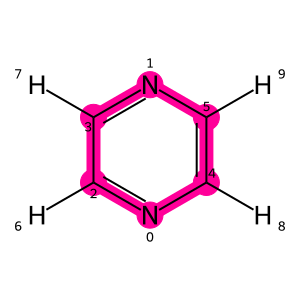

: 

: 

: 

: 

: 

: 

In [ ]:
sel2 = sel.select_bonds(["[#6][#7]"])
# sel = sel.select_atoms(["[#6]"])
sel2 = sel2.select_angles(["[#6]~[#6]~[#7]"])

# sel2.draw(flag_level=2)
sel2.draw(flag_level=3, highlight_color=(1, 0, 0.6))
# sel2.only('bonds')

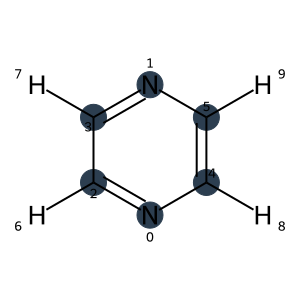

: 

: 

: 

: 

: 

: 

In [ ]:
from shnitsel.geo.geocalc_.bla_chromophor import get_max_chromophor_BLA

res_sel = sel.select_all(['atoms', 'bonds'])


# res = get_max_chromophor_BLA(concatted_tree.atXYZ, SMARTS='[#6,#7]~[#6,#7]~[#6,#7]~[#6,#7]~[#6,#7]~[#6,#7]')
# res
res_sel.draw(flag_level=1)
sel.select_all().select_atoms('[#6,#7]').draw(flag_level=1)

In [ ]:
%time sheet.calc_all()

CPU times: user 1.33 ms, sys: 0 ns, total: 1.33 ms
Wall time: 1.33 ms


: 

: 

: 

: 

: 

: 

In [ ]:
%time sheet.plot_per_state_histograms()

CPU times: user 19 μs, sys: 0 ns, total: 19 μs
Wall time: 23.6 μs


AttributeError: 'Datasheet' object has no attribute 'plot_per_state_histograms'

: 

: 

: 

: 

: 

: 

In [ ]:
%time sheet.plot_timeplots()

CPU times: user 10 μs, sys: 0 ns, total: 10 μs
Wall time: 14.3 μs


AttributeError: 'Datasheet' object has no attribute 'plot_timeplots'

: 

: 

: 

: 

: 

: 

In [ ]:
%time sheet.plot_separated_spectra_and_hists()

CPU times: user 12 μs, sys: 0 ns, total: 12 μs
Wall time: 16.2 μs


AttributeError: 'Datasheet' object has no attribute 'plot_separated_spectra_and_hists'

: 

: 

: 

: 

: 

: 

CPU times: user 45.6 s, sys: 21.1 ms, total: 45.7 s
Wall time: 2.41 s


StopIteration: 

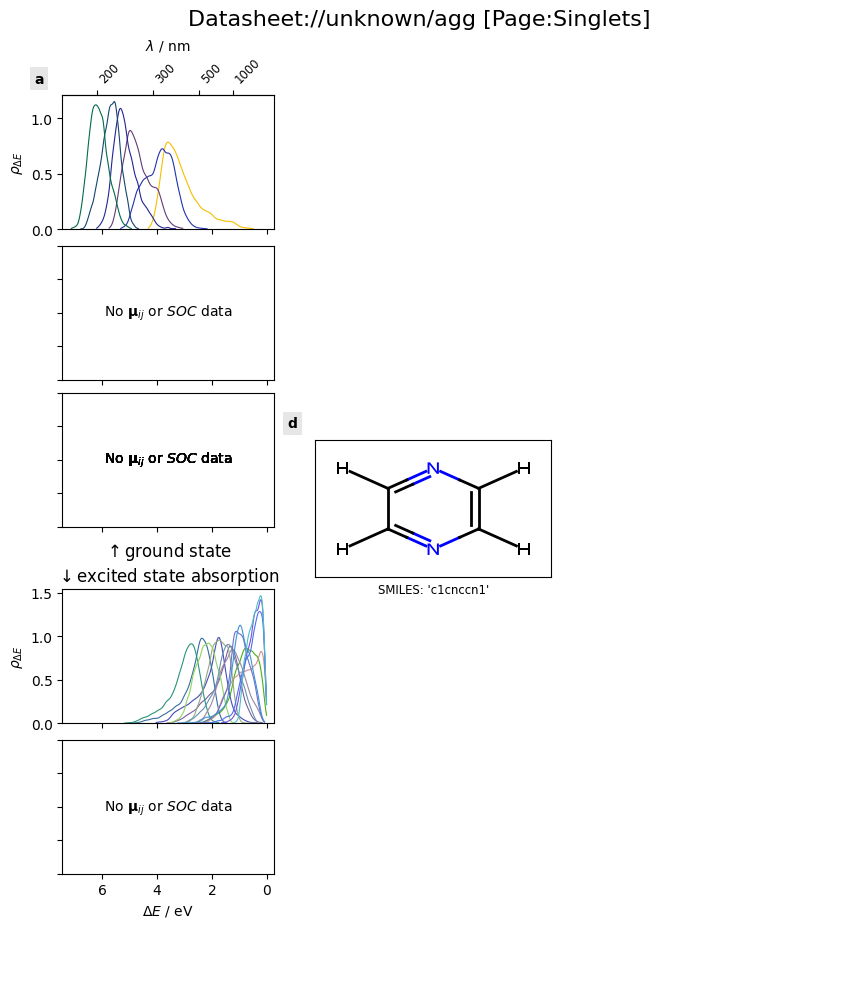

: 

: 

: 

: 

: 

: 

In [ ]:
%time fig = sheet.plot()

In [ ]:
# fig.savefig('/tmp/ethene.png')

: 

: 

: 

: 

: 

: 

## Alkene datasheets

In [ ]:
from glob import iglob

for path in iglob('/nc/Theo_SHNITSEL/filtered/*.nc'):
    print(path)

    sheet = sh.plot.Datasheet(path=path)
    sheet.plot()

: 

: 

: 

: 

: 

: 

## Methylenimmonium

In [ ]:
sheet = sh.plot.Datasheet(path='/nc/Theo_SHNITSEL/unfiltered/CH2NH2_time.nc')
sheet.charge = 1
sheet.plot()

: 

: 

: 

: 

: 

: 

## Save all datasheets

In [ ]:
import os

os.mkdir('/tmp/datasheets')
os.chdir('/nc/SHNITSEL_databases/dynamic/')
paths = dict(
    I01='I01_ch2nh2_dynamic.nc',
    A01='A01_ethene_dynamic.nc',
    A02='A02_propene_dynamic.nc',
    A03='A03_butene_dynamic.nc',
    R01a='R01a_chd50_dynamic.nc',
    R01b='R01b_chd25_dynamic.nc',
)
for ref, path in paths.items():
    sheet = sh.plot.Datasheet(path=path)
    fig = sheet.plot()
    fig.set_dpi(400)
    fig.savefig(f'/tmp/datasheets/{ref}.pdf')
    fig.savefig(f'/tmp/datasheets/{ref}.png')

: 

: 

: 

: 

: 

: 